<a href="https://colab.research.google.com/github/Manaswini1912/INFO-5731/blob/main/INFO5731_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [15]:
import csv
import re
from collections import defaultdict

# Function to tokenize text into words
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Function to extract noun phrases from text
def extract_noun_phrases(text):
    # Custom implementation to extract noun phrases
    # Example: Simple noun phrase extraction by finding consecutive nouns
    noun_phrases = []
    tokens = nltk.word_tokenize(text)
    current_phrase = []
    for token, pos_tag in nltk.pos_tag(tokens):
        if pos_tag.startswith('NN'):  # NN for singular noun, NNS for plural noun
            current_phrase.append(token)
        else:
            if current_phrase:
                noun_phrases.append(' '.join(current_phrase))
                current_phrase = []
    if current_phrase:
        noun_phrases.append(' '.join(current_phrase))
    return noun_phrases

# Load and preprocess the dataset
with open('movie_review_feedback.csv', 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    texts = [row[1] for row in reader]  # Assuming text is in the second column

# Extract noun phrases and calculate relative frequencies for each review
noun_phrases_freqs = defaultdict(lambda: defaultdict(int))
for i, text in enumerate(texts):
    noun_phrases = extract_noun_phrases(text)
    for phrase in noun_phrases:
        noun_phrases_freqs[f'Review {i+1}'][phrase] += 1

# Initialize max_freqs dictionary with all noun phrases
max_freqs = {phrase: 0 for review_freqs in noun_phrases_freqs.values() for phrase in review_freqs}

# Calculate max frequency for each noun phrase
for freqs in noun_phrases_freqs.values():
    for phrase, freq in freqs.items():
        max_freqs[phrase] = max(max_freqs[phrase], freq)

# Construct the table
table = [['Reviews'] + list(max_freqs.keys())]  # Header row
for review, freqs in noun_phrases_freqs.items():
    row = [review]
    for phrase, freq in freqs.items():
        row.append(freq / max_freqs[phrase])  # Relative frequency
    table.append(row)

# Print the table
for row in table:
    print('\t'.join(map(str, row)))


Reviews	films	year	people	Oppenheimer	hours	hour ....	fact	thing	Christopher Nolan	Dunkirk	watch	need	film.But	ways	time period	sound design	scores	performance	film belongs	Murphy	actor	stage	consideration.The film	thriller	figure	point	horror film	sequence	speech	moments	story	history	point.I	length	hour	act	epilogue	third	movie	nothing	means	patience	Babylon	runtime	others	way	feeling	film	dunk	celebrating	cinemas	wits	brain	viewer	audience	respect	dialogue	information	pace	jumps	times	life	hour runtime	clues	relentlessness	urgency	US	chase	bomb	Germany	career	brilliant	Oscar performance	cast	Emily Blunt performance	RDJ	return	decade	screenplay	thick	Bible	cinematography	part	colour	Florence Pugh	score	relentless pacing	hour runtime flies	fan	Nolan	work	flipping	timelines	problem	storytelling	acting	review	Emily Blunt	OTT	gripe	direction	jump cuts	things	music	intrusion	Nolan films	loud music.All	quality watch	days	biopics	tranquil	thriller film	Dark Knight trilogy	Inception	biograph

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [3]:
import csv
import math

# Function to tokenize text into terms
def tokenize(text):
    return text.lower().split()  # Simple tokenization by splitting on whitespace

# Function to calculate term frequency (TF)
def calculate_tf(terms):
    tf_dict = {}
    for term in terms:
        tf_dict[term] = tf_dict.get(term, 0) + 1
    total_terms = len(terms)
    return {term: freq / total_terms for term, freq in tf_dict.items()}

# Function to calculate inverse document frequency (IDF)
def calculate_idf(documents):
    idf_dict = {}
    total_documents = len(documents)
    for document in documents:
        for term in set(document):
            idf_dict[term] = idf_dict.get(term, 0) + 1
    return {term: math.log10(total_documents / freq) for term, freq in idf_dict.items()}

# Function to calculate TF-IDF weights
def calculate_tfidf(tf, idf):
    return {term: tf_val * idf.get(term, 0) for term, tf_val in tf.items()}

# Function to calculate cosine similarity between two vectors
def cosine_similarity(vec1, vec2):
    dot_product = sum(vec1.get(term, 0) * vec2.get(term, 0) for term in set(vec1) | set(vec2))
    magnitude1 = math.sqrt(sum(val ** 2 for val in vec1.values()))
    magnitude2 = math.sqrt(sum(val ** 2 for val in vec2.values()))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0
    return dot_product / (magnitude1 * magnitude2)

# Load and preprocess the dataset
dataset_path = "/content/movie_review_feedback.csv"

documents = []
with open(dataset_path, 'r', encoding='utf-8') as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    for row in reader:
        documents.append(row[1])  # Assuming text is in the second column

# Tokenize documents into terms
tokenized_documents = [tokenize(doc) for doc in documents]

# Calculate IDF
idf = calculate_idf(tokenized_documents)

# Calculate TF-IDF weights for each document
tfidf_matrices = []
for doc in tokenized_documents:
    tf = calculate_tf(doc)
    tfidf = calculate_tfidf(tf, idf)
    tfidf_matrices.append(tfidf)

# Design a query
query = "An Outstanding movie with a haunting performance and best character development"
query_terms = tokenize(query)
query_tf = calculate_tf(query_terms)
query_tfidf = calculate_tfidf(query_tf, idf)

# Calculate cosine similarity between query and each document
cosine_similarities = []
for doc_tfidf in tfidf_matrices:
    similarity = cosine_similarity(query_tfidf, doc_tfidf)
    cosine_similarities.append(similarity)

# Rank documents based on cosine similarity
ranked_documents = sorted(zip(range(1, len(documents) + 1), cosine_similarities), key=lambda x: x[1], reverse=True)

# Print ranked documents
print("Ranked Documents:")
for rank, (doc_id, similarity) in enumerate(ranked_documents, start=1):
    print(f"Rank {rank}: Document {doc_id} (Cosine Similarity: {similarity:.4f})")








Ranked Documents:
Rank 1: Document 18 (Cosine Similarity: 0.0857)
Rank 2: Document 43 (Cosine Similarity: 0.0857)
Rank 3: Document 68 (Cosine Similarity: 0.0857)
Rank 4: Document 93 (Cosine Similarity: 0.0857)
Rank 5: Document 118 (Cosine Similarity: 0.0857)
Rank 6: Document 143 (Cosine Similarity: 0.0857)
Rank 7: Document 168 (Cosine Similarity: 0.0857)
Rank 8: Document 193 (Cosine Similarity: 0.0857)
Rank 9: Document 218 (Cosine Similarity: 0.0857)
Rank 10: Document 243 (Cosine Similarity: 0.0857)
Rank 11: Document 268 (Cosine Similarity: 0.0857)
Rank 12: Document 293 (Cosine Similarity: 0.0857)
Rank 13: Document 318 (Cosine Similarity: 0.0857)
Rank 14: Document 343 (Cosine Similarity: 0.0857)
Rank 15: Document 368 (Cosine Similarity: 0.0857)
Rank 16: Document 393 (Cosine Similarity: 0.0857)
Rank 17: Document 418 (Cosine Similarity: 0.0857)
Rank 18: Document 443 (Cosine Similarity: 0.0857)
Rank 19: Document 468 (Cosine Similarity: 0.0857)
Rank 20: Document 493 (Cosine Similarity: 0.0

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

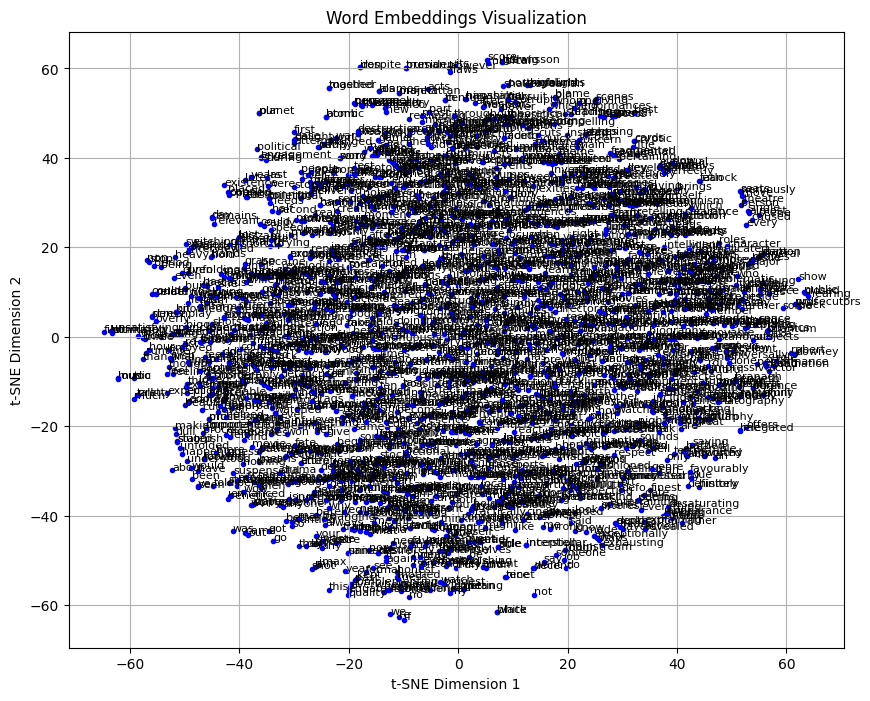

In [22]:
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the movie review feedback dataset
df = pd.read_csv("/content/movie_review_feedback.csv")

# Preprocess the text data
def preprocess_text(text):
    # Clean the text (remove punctuation, special characters, etc.)
    cleaned_text = str(text).lower()  # Convert text to lowercase
    # Additional preprocessing steps if needed
    return cleaned_text

# Tokenize the text
tokenized_data = [gensim.utils.simple_preprocess(preprocess_text(text)) for text in df["Review"]]

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_data, vector_size=300, window=5, min_count=1, workers=4)

# Visualize the word embeddings
def plot_word_embeddings(model):
    words = list(model.wv.index_to_key)
    word_vectors = [model.wv[word] for word in words]
    word_vectors = np.array(word_vectors)  # Convert to numpy array

    tsne = TSNE(n_components=2, random_state=42)
    word_vectors_tsne = tsne.fit_transform(word_vectors)

    plt.figure(figsize=(10, 8))
    plt.scatter(word_vectors_tsne[:, 0], word_vectors_tsne[:, 1], marker='.', color='b')

    for i, word in enumerate(words):
        plt.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), fontsize=8)

    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.title("Word Embeddings Visualization")
    plt.grid(True)
    plt.show()

# Plot word embeddings
plot_word_embeddings(model)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:https://github.com/Manaswini1912/INFO-5731/blob/main/sentiment%20analysis%20for%20movie%20reviews.xlsx



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Creating training and evaluation data for sentiment analysis was a fascinating journey. I enjoyed reading various reviews and tagging them with sentiments. However, ensuring accurate sentiment annotations was tricky due to the nuanced nature of sentiments. Cleaning the data to remove noise was time-consuming but necessary for dataset quality. Despite challenges, building a custom dataset from scratch was rewarding and provided insights into natural language processing. The time provided for the assignment was sufficient, but effective time management was crucial to meet the deadline. Overall, the assignment offered valuable learning experiences in sentiment analysis and data preprocessing.